# **Compute Sentiments Using Python Lexical, ML, DNN and Transformers**

By: Jon Chun
12 Jun 2021 : Start
20 Apr 2022 : Last Edit

# **[RESTART RUNTIME] May be Required**

In [ ]:
# [CHECK] (If disconnected) @ometimes you can reconnect to your old machine
#         use %whos to see if your old program enviroment still exists. 
#         If 'Interactive namesapce is empty' you must reexecute everything

%whos

In [ ]:
# [RESTART RUNTIME] May be Required

!pip install flair

In [ ]:
# [RESTART RUNTIME] May be Required

!pip install texthero

In [ ]:
# [RESTART RUNTIME] May be Required

# Designed Security Hole in older PyYAML
#   must upgrade to use plotly

# !pip install pyyaml==5.4.1

# **[STEP 1] Manual Configuration/Setup**



## (Popups) Connect Google gDrive

In [ ]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive', force_remount=True)
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

## (3 Inputs) Define Directory Tree

In [ ]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.

# #@markdown **Instructions**

# #@markdown Set Directory and Corpus names:
# #@markdown <li> Set <b>Path_to_SentimentArcs</b> to the project root in your **GDrive folder**
# #@markdown <li> Set <b>Corpus_Genre</b> = [novels, finance, social_media]
# #@markdown <li> <b>Corpus_Type</b> = [reference_corpus, new_corpus]
# #@markdown <li> <b>Corpus_Number</b> = [1-20] (id nunmber if a new_corpus)

#@markdown <hr>

# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/sentimentarcs_notebooks/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}


#@markdown Set this to the project root in your <b>GDrive folder</b>
#@markdown <br> (e.g. /<wbr><b>gdrive/MyDrive/research/sentiment_arcs/</b>)

#@markdown <hr>

#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

# Corpus_Type = "reference" #@param ["new", "reference"]
Corpus_Type = "new" #@param ["new", "reference"]


Corpus_Number = 5 #@param {type:"slider", min:1, max:10, step:1}


#@markdown Put in the corresponding Subdirectory under **./text_raw**:
#@markdown <li> All Texts as clean <b>plaintext *.txt</b> files 
#@markdown <li> A <b>YAML Configuration File</b> describing each Texts

#@markdown Please verify the required textfiles and YAML file exist in the correct subdirectories before continuing.

print('Current Working Directory:')
%cd $Path_to_SentimentArcs

print('\n')

if Corpus_Type == 'reference':
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_reference'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_reference'
else:
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'

# PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_TEXT_RAW}'
# PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'
PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'

# TODO: Clean up
# SUBDIR_TEXT_CLEAN = PATH_TEXT_CLEAN

print(f'PATH_SENTIMENT_RAW:\n  [{PATH_SENTIMENT_RAW}]')
print(f'SUBDIR_SENTIMENT_RAW:\n  [{SUBDIR_SENTIMENT_RAW}]')

print('\n')

print(f'PATH_TEXT_CLEAN:\n  [{PATH_TEXT_CLEAN}]')
print(f'SUBDIR_TEXT_CLEAN:\n  [{SUBDIR_TEXT_CLEAN}]')

# **[STEP 2] Automatic Configuration/Setup**

In [ ]:
# Add PATH for ./utils subdirectory

import sys
import os

!python --version

print('\n')

PATH_UTILS = f'{Path_to_SentimentArcs}utils'
PATH_UTILS

sys.path.append(PATH_UTILS)

print('Contents of Subdirectory [./sentiment_arcs/utils/]\n')
!ls $PATH_UTILS

# More Specific than PATH for searching libraries
# !echo $PYTHONPATH

In [ ]:
# Review Global Variables and set the first few

import global_vars as global_vars

global_vars.SUBDIR_SENTIMENTARCS = Path_to_SentimentArcs
global_vars.Corpus_Genre = Corpus_Genre
global_vars.Corpus_Type = Corpus_Type
global_vars.Corpus_Number = Corpus_Number

global_vars.SUBDIR_SENTIMENT_RAW = SUBDIR_SENTIMENT_RAW
global_vars.PATH_SENTIMENT_RAW = PATH_SENTIMENT_RAW

global_vars.SUBDIR_TEXT_CLEAN = SUBDIR_TEXT_CLEAN
global_vars.PATH_TEXT_CLEAN = PATH_TEXT_CLEAN

dir(global_vars)

## (each time) Custom Libraries & Define Globals

In [ ]:
# Initialize and clean for each iteration of notebook

# dir(global_vars)

global_vars.corpus_texts_dt = {}
global_vars.corpus_titles_dt = {}

In [ ]:
# Import SentimentArcs Utilities to define Directory Structure
#   based the Selected Corpus Genre, Type and Number

!pwd 
print('\n')

# from utils import sa_config # .sentiment_arcs_utils
from utils import sa_config

print('Objects in sa_config()')
print(dir(sa_config))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
sa_config.get_subdirs(Path_to_SentimentArcs, Corpus_Genre, Corpus_Type, Corpus_Number, 'none')


In [ ]:
# Call SentimentArcs Utility to define Global Variables

sa_config.set_globals()

# Verify sample global var set
print(f'MIN_PARAG_LEN: {global_vars.MIN_PARAG_LEN}')
print(f'STOPWORDS_ADD_EN: {global_vars.STOPWORDS_ADD_EN}')
print(f'global_vars.TEST_WORDS_LS: {global_vars.global_vars.TEST_WORDS_LS}')
print(f'SLANG_DT: {global_vars.SLANG_DT}')

## Configure Jupyter Notebook

In [ ]:
# Configure Jupyter

# To reload modules under development

# Option (a)
%load_ext autoreload
%autoreload 2
# Option (b)
# import importlib
# importlib.reload(functions.readfunctions)


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## (each time) Read YAML Configuration for Corpus and Models 

In [ ]:
# from utils import sa_config # .sentiment_arcs_utils

import yaml

from utils import read_yaml

print('Objects in read_yaml()')
print(dir(read_yaml))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
read_yaml.read_corpus_yaml(Corpus_Genre, Corpus_Type, Corpus_Number)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = global_vars.models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = list(global_vars.corpus_titles_dt.keys())
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

global_vars.corpus_titles_dt

## Install Libraries: Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from glob import glob
import copy
import json # Installed above in YAML Configuration Section

## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [ ]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------')
print('\n  (Uncomment to view)')
# plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')

## Setup Seaborn Style

In [ ]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')

"""
# Seaborn: Set Context
# sns.set_context("notebook")

# Seaborn: Set Theme (Scale of Font)
sns.set_theme('paper')  # paper, notebook, talk, poster

# Seaborn: Set Style
# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks
plt.style.use('seaborn-whitegrid')

# sns.set_palette('tab10')
# sns.color_palette()

# sns.set_palette('tab10')
# sns.color_palette()
""";

In [ ]:
"""
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')
""";

## Python Utility Functions

### (each time) Generate Convenient Data Lists

In [ ]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
global_vars.corpus_titles_dt
print('\n')

corpus_texts_ls = list(global_vars.corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(global_vars.corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


In [ ]:
# Get Model Families of Ensemble

from utils.get_model_families import get_ensemble_model_famalies

global_vars.models_ensemble_dt = get_ensemble_model_famalies(global_vars.models_titles_dt)

print('\nTest: Lexicon Family of Models:')
global_vars.models_ensemble_dt['lexicon']

### File Functions

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/file_utils.py'
# from utils.file_utils import *

# %run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read all Preprocessed Novels**

In [ ]:
# Verify cwd and subdir of Cleaned Corpus Texts

print('Current Working Directory:')
!pwd

print(f'\nSubdir with all Cleaned Texts of Corpus:\n  {SUBDIR_TEXT_CLEAN}')

print(f'\n\nFilenames of Cleaned Texts:\n')
!ls -1 {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

In [ ]:
# Create a List (preprocessed_ls) of all preprocessed text files

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

try:
    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

In [ ]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

corpus_texts_dt = {}

for i,atext in enumerate(preprocessed_ls):
  print(f'Processing #{i}: {atext}...')
  afile_fullpath = f'{PATH_TEXT_CLEAN}/{atext}.csv'
  print(f'               {afile_fullpath}')
  atext_df = pd.read_csv(afile_fullpath, index_col=[0])
  corpus_texts_dt[atext] = atext_df

# Verify the Text read into master Dictionary of DataFrames
print('\n')
corpus_texts_dt.keys()
print('\n')
print(f'There were {len(corpus_texts_dt)} preprocessed Text read into the Dict corpus_texts_dt')

In [ ]:
# Check if there are any Null strings in the text_clean columns

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  print(f'\nText #{i}: {atext}')
  nan_ct = corpus_texts_dt[atext].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')

In [ ]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  corpus_texts_dt[atext][corpus_texts_dt[atext].text_clean.isna()] = 'empty_string'

In [ ]:
# Verify DataFrame of first Text in Corpus Dictionary

corpus_texts_dt[corpus_texts_ls[0]].head()

# **[STEP 4] Get Sentiments**

## **Lexicons**

* https://github.com/trinker/lexicon/tree/master/data

In [ ]:
# PyReadR enables Python to read R datafiles (e.g. *.rda)

!pip install pyreadr

import pyreadr

In [ ]:
# Global Dict of all Lexicon Dictionaries

lexicons_dt = {}

In [ ]:
def get_lexsent_sentiment(asent_str, lexicon_dt):
  '''
  Given a Sentence in string form and a Lexicon Dictionary
  Return the Sentiment of the Sentence = Sum(Sentiment(all words))
  '''

  sent_sentiment = 0
  word_ls = asent_str.split()
  for aword in word_ls:
    word_sentiment = lexicon_dt.get(aword)
    if word_sentiment != None:
      sent_sentiment += float(word_sentiment)

  return sent_sentiment

In [ ]:
"""
def lexicon_sentiment(lexicon_dt, text_str):
  '''
  Given a lexicon dict[word]=sentiment and a string
  Return a sentiment ('pos'|'neg') and a polarity (-1.0 to 1.0)
  '''

  word_ls = text_str.split()
  text_polarity = 0

  for aword in word_ls:
    word_sentiment = lexicon_dt.get(aword)
    if word_sentiment != None: #lexicon_dt.get(aword) != None:
      # print(f'Word: {aword} Polarity: {word_sentiment}')
      text_polarity += word_sentiment # lexicon_dt[aword]

  if text_polarity > 0.0:
    text_sentiment = 'pos'
  else:
    text_sentiment = 'neg'
  
  # Return tuple of polarity ('positive'|'negative') and sentiment float value (-1.0 to 1.0)
  return text_sentiment, round(text_polarity, 4)

# Test
test_str = "I love enjoying the great outdoors!"
test_tp = lexicon_sentiment(lexicon_jockersrinker_dt, test_str)
print(f'The Sentence: {test_str}\n\n  Sentiment: {test_tp[0]}\n\n  Polarity:  {test_tp[1]}')

""";

In [ ]:
# TODO: UNUSED?

# Calculate Pattern Sentiment [0,1,2]
"""
def pattern_discrete2continous_sentiment(text):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_total = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    text_sentiment_total += pattern_sa(str(aword))[0]
  text_sentiment_norm = text_sentiment_total/(np.log(text_len)+0.01)

  return text_sentiment_norm
""";

### **Jockers-Rinker**

In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_jockersrinker'
model_type = 'Lexicon'

url = f"https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_{lexicon_name}.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **HuLiu (aka Bing)**

In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'huliu'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_huliu'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_huliu.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **NRC**

In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'nrc'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_nrc'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_nrc.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Plot New Lexicon Values

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **SentiWord**

* https://www.sentic.net/sentic-patterns.pdf
* https://www.quora.com/Sentiment-Analysis-How-does-CLiPS-Pattern-calculate-the-polarity-of-a-sentence-What-is-the-maths-involved-in-it 
* https://github.com/clips/pattern/wiki/pattern-en#sentiment


In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'sentiword'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_sentiword'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_sentiword.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(aword_str.lower()) is None):
    # print(f'ERROR: {aword_str} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {aword_str} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(aword_str.lower())
    print(f'[{word_sentiment_fl: ^8}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(asent_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {asent_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **SenticNet**

In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'senticnet'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_senticnet'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_senticnet.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Plot New Lexicon Values

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **Loughran-McDonald**

In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'loughran_mcdonald'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_lmcd'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_loughran_mcdonald.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **(FUTURE) MPQA**

* https://mpqa.cs.pitt.edu/

In [ ]:
# !wget https://mpqa.cs.pitt.edu/corpora/mpqa_corpus/mpqa_corpus_3_0

In [ ]:
# !ls -altr
# !head -n 10 mpqa_corpus_3_0

### **(FUTURE) LIWC**

* https://github.com/search?q=LIWC
* https://github.com/search?q=LIWC

### **AFINN**

In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn(language='en')

lexicon_name = 'AFINN'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'afinn'
model_type = 'Lexicon'

In [ ]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = afinn.score(aword_str.lower())
  print(f'[{word_sentiment_fl: ^8}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  words_ls = asent_str.split()
  sent_sentiment_fl = 0.0

  for j, atest_word in enumerate(words_ls):
    sent_sentiment_fl += afinn.score(atest_word.lower())

  print(f'[{sent_sentiment_fl: ^8}]: {asent_str}\n')

In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: afinn.score(x.lower()))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

In [ ]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

In [ ]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_7lex.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_7lex.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

In [ ]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

In [ ]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=subdir_path)
test_dt.keys()
print('\n')
test_dt[corpus_texts_ls[0]].info()

## **Lexicons + Heuristics**

### **VADER**

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

lexicon_name = 'VADER'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'vader'
model_type = 'Heuristic'

test_str = "The food was great!"

vs = vader_analyzer.polarity_scores(test_str)
print("{:-<65} {}".format(test_str, str(vs)))

In [ ]:
def sent2vader_comp(asent_str):
  '''
  Given a Sentence as a text string
  Return a Sentiment = sum(VADER sentiments for each word)
  '''

  words_ls = asent_str.split()
  sent_sentiment_fl = 0.0

  for j, atest_word in enumerate(words_ls):
    sent_sentiment_fl += vader_analyzer.polarity_scores(atest_word.lower())['compound']

  return sent_sentiment_fl


In [ ]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # print(f'Looking up VADER sentiment for {aword_str}')
  word_sentiment_fl = vader_analyzer.polarity_scores(aword_str.lower())['compound']
  print(f'[{word_sentiment_fl: ^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sent2vader_comp(asent_str)
  print(f'[{sent_sentiment_fl: ^8.3f}]: {asent_str}\n')


In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: sent2vader_comp(x.lower()))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

## **Embeddings**

* https://neptune.ai/blog/document-classification-small-datasets
* https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair (TB,VADER,Flair)

### **(FUTURE) FastText**

* https://github.com/facebookresearch/fastText
* https://medium.com/@lope.ai/sentiment-analysis-example-using-fasttext-6b1b4d334c53
* https://colab.research.google.com/drive/1bb2OWQcDDolESwhkATD0el0RvF33fenZ#scrollTo=X5PWbhOzZ3ze
* https://fasttext.cc/docs/en/english-vectors.html (embeddings)
* https://github.com/RaRe-Technologies/gensim/blob/37e49971efa74310b300468a5b3cf531319c6536/docs/notebooks/Word2Vec_FastText_Comparison.ipynb
* https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/
* https://github.com/jatinmandav/Neural-Networks/tree/master/Sentiment-Analysis (Universal Sentence Encoder 77%, fastText 69%, word2vec 69%)
* https://github.com/search?q=fasttext+sentiment

Code:
* https://github.com/charlesmalafosse/FastText-sentiment-analysis-for-tweets/blob/master/betsentiment_sentiment_analysis_fasttext.py (tweets)
* https://gist.github.com/hiteshn97/8f222a2773e11d6921b937abaa21ab75 (fastText,  keras)

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip
%cd fastText-0.9.2
!make

In [ ]:
!ls

In [ ]:
!ls ../

In [ ]:
%%time

train = open('tweets.train','w')  
test = open('tweets.valid','w')  
# with open('../sentiment140.1600000.csv', mode='r', encoding = "ISO-8859-1") as csv_file:  
with open('../sentiment140.csv', mode='r', encoding = "ISO-8859-1") as csv_file:  
    csv_reader = csv.DictReader(csv_file, fieldnames=['target', 'id', 'date', 'flag', 'user', 'text'])
    line = 0
    for row in csv_reader:
        # Clean the training data
        # First we lower case the text
        text = row["text"].lower()
        # remove links
        text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
        #Remove usernames
        text = re.sub('@[^\s]+','', text)
        # replace hashtags by just words
        text = re.sub(r'#([^\s]+)', r'\1', text)
        #correct all multiple white spaces to a single white space
        text = re.sub('[\s]+', ' ', text)
        # Additional clean up : removing words less than 3 chars, and remove space at the beginning and teh end
        text = re.sub(r'\W*\b\w{1,3}\b', '', text)
        text = text.strip()
        line = line + 1
        # Split data into train and validation
        if line%16 == 0:
            print(f'__label__{row["target"]} {text}', file=test)
        else:
            print(f'__label__{row["target"]} {text}', file=train)

In [ ]:
%%time

!./fasttext supervised -input tweets.train -output model_tweet
# !./fasttext supervised -input tweets.train -output model_tweet -epoch 30 -lr 0.1
# !./fasttext supervised -input tweets.train -output model_tweet -dim 300 -label __label__ -pretrainedVecctors wiki.ar.vec # Arabic for Netflix

In [ ]:
%%time

!./fasttext test model_tweet.bin tweets.valid

In [ ]:
!pip install fasttext

In [ ]:
from fasttext import load_model

In [ ]:
classifier = load_model('model_tweet.bin')

In [ ]:
text_ls = ['Ugghhh... Not happy at all! sorry', 'Happyyyyyyy', 'OH yeah! lets rock.']
labels = classifier.predict(text_ls)
print(labels)

In [ ]:
with open('test.txt','w') as fp:
  fp.write("\n".join(text_ls))

In [ ]:
!cat test.txt

In [ ]:
!./fasttext predict model_tweet.bin test.txt

In [ ]:
!./fasttext predict-prob model_tweet.bin test.txt

In [ ]:
!ls

In [ ]:
!ls ../

In [ ]:
!head -n 10 tweets.train

!cat tweets.train | wc -l

In [ ]:
# Load Different Embeddings

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

In [ ]:
!ls

In [ ]:
!unzip crawl-300d-2M-subword.zip

In [ ]:
!ls 

In [ ]:
import io

fname = 'crawl-300d-2M-subword.vec'

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

load_vectors(fname)

In [ ]:
%cd ..

### **TextBlob**

In [ ]:
from textblob import TextBlob

lexicon_name = 'TextBlob'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'textblob'
model_type = 'Heuristic'


In [ ]:
def sent2textblob(asent_str):
  '''
  Given a Sentence as a text string
  Return a Sentiment = sum(TextBlob sentiments for each word)
  '''

  words_ls = asent_str.split()
  sent_sentiment_fl = 0.0

  for j, atest_word in enumerate(words_ls):
    sent_sentiment_fl += TextBlob(atest_word.lower()).sentiment.polarity

  return sent_sentiment_fl


In [ ]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # print(f'Looking up VADER sentiment for {aword_str}')
  word_sentiment_fl = TextBlob(aword_str.lower()).sentiment.polarity
  print(f'[{word_sentiment_fl: ^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sent2textblob(asent_str)
  print(f'[{sent_sentiment_fl: ^8.3f}]: {asent_str}\n')


In [ ]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: sent2textblob(x.lower()))

In [ ]:
corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

In [ ]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

In [ ]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_7lex1heu1emb.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_7lex1heu1emb.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

In [ ]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

## **Linguistic Models**

### **Pattern**

* https://github.com/clips/pattern/blob/master/examples/03-en/07-sentiment.py

* https://github.com/clips/pattern/wiki/pattern-en#sentiment

In [200]:
!pip install pattern

     |████████████████████████████████| 22.2 MB 1.4 MB/s 
     |████████████████████████████████| 87 kB 8.3 MB/s 
     |████████████████████████████████| 81 kB 11.3 MB/s 
     |████████████████████████████████| 5.6 MB 51.7 MB/s 
     |████████████████████████████████| 5.6 MB 54.3 MB/s 
     |████████████████████████████████| 419 kB 58.8 MB/s 
     |████████████████████████████████| 104 kB 64.8 MB/s 
     |████████████████████████████████| 3.6 MB 52.0 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=593a104b1a985e7ba1a97a69897f9e836ef2ffaa2ebd5f7d950aa83811d5a645
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.0-cp37-cp37m-linux_x86_64.whl size=99978 sha256=c708dad1968920639bd3020715c81c56d56748eedb61454c1886f6b4369bb97b
  Stored in directory: /root/.cache/pip/wheels/97/d4/df/08cd6e1fa4a8691b268ab254bd0fa589827ab5b65638c010b4
 

In [201]:
from pattern.en import sentiment, polarity, subjectivity, positive

lexicon_name = 'Pattern'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pattern'
model_type = 'Linguistic'

# Sentiment analysis (or opinion mining) attempts to determine if
# a text is objective or subjective, positive or negative.
# The sentiment analysis lexicon bundled in Pattern focuses on adjectives.
# It contains adjectives that occur frequently in customer reviews,
# hand-tagged with values for polarity and subjectivity.

# The polarity() function measures positive vs. negative, as a number between -1.0 and +1.0.
# The subjectivity() function measures objective vs. subjective, as a number between 0.0 and 1.0.
# The sentiment() function returns an averaged (polarity, subjectivity)-tuple for a given string.
for word in ("amazing", "horrible", "public"):
    print(word, sentiment(word))

print("")
print(sentiment(
    "The movie attempts to be surreal by incorporating time travel and various time paradoxes,"
    "but it's presented in such a ridiculous way it's seriously boring."))


amazing (0.6000000000000001, 0.9)
horrible (-1.0, 1.0)
public (0.0, 0.06666666666666667)

(-0.21666666666666665, 0.8)


In [202]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # print(f'Looking up VADER sentiment for {aword_str}')
  word_sentiment_fl = polarity(aword_str.lower())
  print(f'[{word_sentiment_fl: ^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = polarity(asent_str)
  print(f'[{sent_sentiment_fl: ^8.3f}]: {asent_str}\n')


Testing Pattern lexicon for WORDS Sentiment
--------------------------------------------------
[ 0.500  ]: Love

[ -0.800 ]: Hate

[ 0.400  ]: bizarre

[ -0.050 ]: strange

[ 0.000  ]: furious

[ 0.000  ]: elated

[ -0.100 ]: curious

[ 0.000  ]: beserk

[ 0.000  ]: gambaro


Testing Pattern lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -0.825 ]: I hate bad evil worthless Mondays.

[ 0.500  ]: I love Paris in the springtime

[ 0.000  ]: It was Wednesday.

[ -0.900 ]: You are a disgusting pig - I hate you.

[ 0.600  ]: What a delightfully funny and beautiful good man.

[ 0.000  ]: That was it



In [203]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: polarity(x.lower()))

Processing #0: pkdick_doandroidsdreamofelectricsheep


In [204]:
corpus_texts_dt[corpus_texts_ls[0]].head()

,text_raw,text_clean,pysentimentr_jockersrinker,pysentimentr_huliu,pysentimentr_nrc,pysentimentr_sentiword,pysentimentr_senticnet,pysentimentr_lmcd,afinn,vader,textblob,pattern
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0.0,1.0,0.218750,2.566,1.0,1.0,0.2500,0.0000,0.0000
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0.0,1.0,0.166667,2.227,0.0,1.0,0.2023,-0.1875,-0.1875
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,1.20,0.0,2.0,0.510417,0.886,0.0,1.0,0.5464,0.0000,0.0000
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0.0,-1.0,-0.104167,-0.121,-1.0,-3.0,0.0000,0.0000,0.0000
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1.0,0.0,-0.225000,0.169,-1.0,-2.0,-0.4404,-0.3750,-0.3750


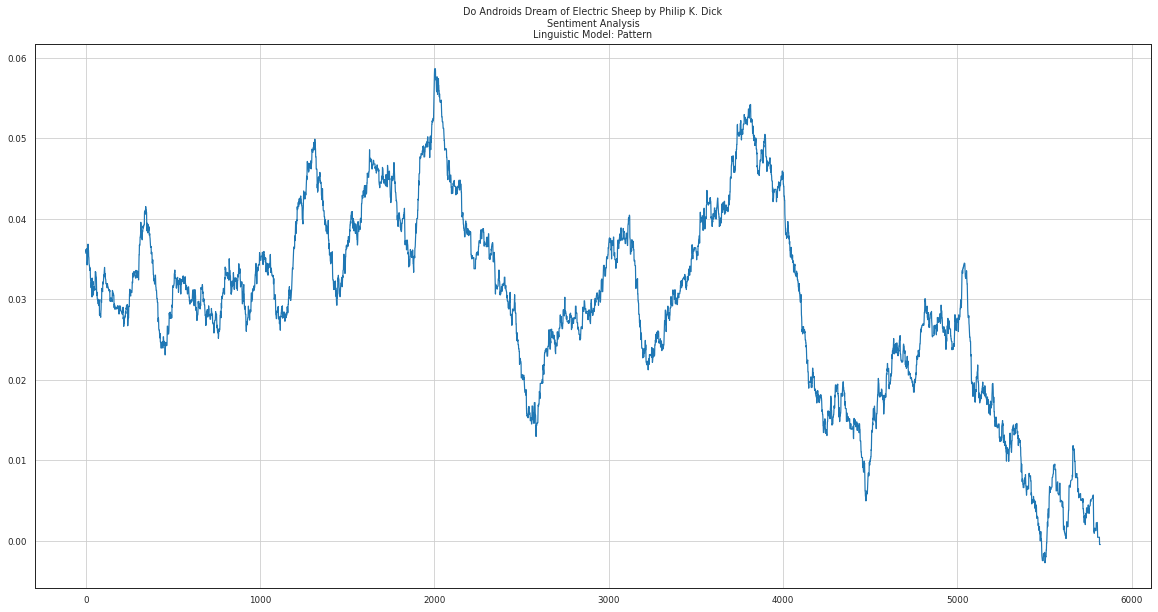

In [206]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [207]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

/gdrive/MyDrive/sentimentarcs_notebooks


SUBDIR_SENTIMENT_RAW: sentiment_raw_novels_new_corpus5/


Existing Sentiment Datafiles in Destination Subdir:

sentiment_raw_novels_new_corpus5_all_4syuzhetr.json
sentiment_raw_novels_new_corpus5_all_7lex1heu1emb.json
sentiment_raw_novels_new_corpus5_all_7lex.json
sentiment_raw_novels_new_corpus5_all_8sentimentr.json
sentiment_raw_novels_new_corpus5_transformer_distilbertfinnews.json
sentiment_raw_novels_new_corpus5_transformer_finbert.json
sentiment_raw_novels_new_corpus5_transformer_finberttone.json
sentiment_raw_novels_new_corpus5_transformer_hinglish.json
sentiment_raw_novels_new_corpus5_transformer_huggingface.json
sentiment_raw_novels_new_corpus5_transformer_imdb2way.json
sentiment_raw_novels_new_corpus5_transformer_nlptown.json
sentiment_raw_novels_new_corpus5_transformer_roberta15lg.json
sentiment_raw_novels_new_corpus5_transformer_robertaxml8lang.json
sentiment_raw_novels_new_corpus5_transformer_t5imdb50k.json
sentiment_raw_novels_new_

In [208]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Corpus_Genre: novels
        Corpus_Type: new
      Corpus_Number: 5

These Text Titles:



dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

In [209]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_7lex1heu1emb1ling.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_7lex1heu1emb1ling.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

Saving to:
  sentiment_raw_novels_new_corpus5_all_7lex1heu1emb1ling.json
Writing to subdir:
  ./sentiment_raw/sentiment_raw_novels_new_corpus5/
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus5/sentiment_raw_novels_new_corpus5_all_7lex1heu1emb1ling.json


In [210]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

total 17701
-rw------- 1 root root 1911427 Apr 20 03:07 sentiment_raw_novels_new_corpus5_all_4syuzhetr.json
-rw------- 1 root root 3418637 Apr 20 03:19 sentiment_raw_novels_new_corpus5_all_8sentimentr.json
-rw------- 1 root root  392712 Apr 20 04:04 sentiment_raw_novels_new_corpus5_transformer_roberta15lg.json
-rw------- 1 root root  392748 Apr 20 04:10 sentiment_raw_novels_new_corpus5_transformer_huggingface.json
-rw------- 1 root root  364785 Apr 20 04:18 sentiment_raw_novels_new_corpus5_transformer_nlptown.json
-rw------- 1 root root  250315 Apr 20 04:28 sentiment_raw_novels_new_corpus5_transformer_yelp.json
-rw------- 1 root root  273595 Apr 20 04:40 sentiment_raw_novels_new_corpus5_transformer_hinglish.json
-rw------- 1 root root  273595 Apr 20 04:45 sentiment_raw_novels_new_corpus5_transformer_imdb2way.json
-rw------- 1 root root 2795032 Apr 20 05:06 sentiment_raw_novels_new_corpus5_all_7lex.json
-rw------- 1 root root  282710 Apr 20 05:08 sentiment_raw_novels_new_corpus5_transfo

## **Statistical ML Models**

* Linear Regression
* Logistic Regression
* Random Forest Classifier
* Linear SVC
* MultinomialNB

Tutorials

* https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794 (Tutorial) 
* https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/natural_language_processing/example_text_classification.ipynb (github)
* https://wellsr.com/python/python-sentiment-analysis-with-sklearn/
* https://colab.research.google.com/drive/186bOdu08nv4xHe6VeBgt_aIk9_fziqsX#scrollTo=hpDp3V0Lg-sw

#### Setup and Configuration


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.sparse import save_npz, load_npz  # load/save sparse matrices
from joblib import dump, load # load/save sklearn objects efficiently

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [ ]:
# Vectorizing text
from sklearn.feature_extraction.text import TfidfVectorizer


# Validation: https://www.kaggle.com/pocooo/types-of-cross-validation-all-you-need

# Simple Cross Fold Validation
from sklearn.model_selection import KFold
# model=DecisionTreeClassifier()
kfold_validation=KFold(10)

# import numpy as np
from sklearn.model_selection import cross_val_score
# results=cross_val_score(model,X,y,cv=kfold_validation)
# print(results)
# print(np.mean(results))

# Stratified CV 
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
# model=DecisionTreeClassifier()
# scores=cross_val_score(model,X,y,cv=skfold)
# print(np.mean(scores))

# LOO CV
from sklearn.model_selection import LeaveOneOut
# model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
# results=cross_val_score(model,X,y,cv=leave_validation)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# TODO: Next few cells unneeded?

In [ ]:
nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
stopwords_custom = ['bazinga', 'hoohaw', 'pating']
stopwords_en.extend(stopwords_custom)

In [ ]:
# Utility Functions for ML Model Metrics

# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

def lexicon_metrics(y, y_pred):
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

In [ ]:
from sklearn.pipeline import Pipeline
text_clf_SGDClassifier = Pipeline([('vect', CountVectorizer(ngram_range=(2,4), stop_words='english',lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),
])
text_clf_SGDClassifier.fit(X, y)



In [ ]:
!ls ./data

In [ ]:
# TEST
fld = './data/'

[os.path.join(fld, f) for f in os.listdir() if os.path.isfile(os.path.join(fld, f))]

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly
import plotly.graph_objs as go
# import plotly.offline as ply
# plotly.offline.init_notebook_mode()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
classifier_names = ['Naive Bayes', 
                    'Decision Tree', 
                    'Random Forest', 
                    'Nearest Neighbors', 
                    'Neural Network']

classifiers = [GaussianNB(),
               DecisionTreeClassifier(max_depth=10),
               RandomForestClassifier(max_depth=10),
               KNeighborsClassifier(5),
               MLPClassifier()]

plot_data=[]

clf_data=zip(classifier_names, classifiers)

for clf_name, clf in clf_data:
    print('Running '+clf_name)
    kf=StratifiedKFold(n_splits=10, shuffle=True)
    scores=cross_val_score(clf, X, y, cv=kf)
    print(scores)
    plot_data.append(
        go.Scatter(
            x=[i+1 for i in range(10)],
            y=scores,
            mode='lines',
            name=clf_name
        )
    )



#### Download Sentiment IMDB Training Dataset (if necessary)

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Check if IMDB datafile exists, download if missing

filepath_imdb = f"{SUBDIR_DATA}imdb-dataset-of-50k-movie-reviews.zip"
print(f'filepath: {filepath_imdb}')

my_file = Path(filepath_imdb)
if my_file.is_file():
  print('\n[SKIP] to the next Section [Load IMDB Dataset]\n       IMDB training dataset already exists\n')
else:
  print('\n[CONTINUE] executing code cells')


In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Get IMDB Dataset

%cd ./data
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip
!ls -altr

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

### Prepare IMDB Dataset

In [ ]:
# Verify in project root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
imdb50k_df = pd.read_csv(f"{SUBDIR_DATA}IMDB Dataset.csv")
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

# supervised_db = 'imdb50k'

imdb50k_df.head()
imdb50k_df.info()

#### Clean and Split Training Dataset

In [ ]:
import nltk
nltk.download('omw-1.4')

In [ ]:
import texthero as hero
from texthero import preprocessing

stem_pipeline = [preprocessing.fillna,
                 preprocessing.lowercase,
                 preprocessing.remove_digits,
                 preprocessing.remove_punctuation,
                 preprocessing.remove_diacritics,
                 preprocessing.remove_stopwords,
                 preprocessing.remove_whitespace,
                 preprocessing.stem]

In [ ]:
%%time

# NOTE: 3m55s @02:54 on 20220302 Colab Pro
#        

imdb50k_df['text_clean'] = imdb50k_df['text_raw'].pipe(hero.clean, stem_pipeline)

In [ ]:
# Saved Cleaned IMDB Training Text Datafile

fname_imdb50k_clean = f'{SUBDIR_DATA}imdb50k_clean.csv'
imdb50k_df.to_csv(fname_imdb50k_clean, index=False)
!ls -altr 

In [ ]:
!ls ./data

In [ ]:
TRAIN_TEST_SPLIT_PER = 0.8

data_len = imdb50k_df.shape[0]
split_indx = int(TRAIN_TEST_SPLIT_PER * data_len)

train_df = imdb50k_df[:split_indx]
test_df = imdb50k_df[split_indx:]

print(f'Splitting {TRAIN_TEST_SPLIT_PER*100:.2f}% of Training Data for Testing')
print(f'  There are {data_len} examples, {split_indx} of them used for Testing, {data_len - split_indx} for Training')

In [ ]:
train_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import datasets

In [ ]:
%%time

# NOTE: 

# Vectorize IMDB Review (Representation: Trigram TF-IDF)

# Step 1: Bigram
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bigram_vectorizer.fit(train_df['text_clean'].values)

# X_train_bigram = bigram_vectorizer.transform(train_df['text_clean'].values)


# Step 2: TF-IDF
# Texthero removes stopwords
# CountVectorizer includes high-freq bigrams
# CountVectorizer limits max_features/token vocabulary size
# without max features IMDB Training (40k reviews), X_train_bigram_tf_idf shape = (40000, 2211883)
# bigram_tf_idf_transformer = TfidfTransformer(ngram_range=(1,2), stop_words=stopwords_en_ls, max_features=1000)
bigram_tf_idf_transformer = TfidfTransformer()
bigram_tf_idf_transformer.fit(X_train_bigram)

X_train_bigram_tf_idf = bigram_tf_idf_transformer.transform(X_train_bigram)
X_train = X_train_bigram_tf_idf
y_train = train_df['polarity']


In [ ]:
type(X_train_bigram_tf)

In [ ]:
%%time

# NOTE: 50s

# Save checkpoint

!pwd
filename_save = f'{SUBDIR_DATA}imdb50k_stems.csv'
imdb50k_df.to_csv(filename_save, encoding='utf-8', index=False)
!ls -altr $SUBDIR_DATA

In [ ]:
!ls ./data

#### Vectorize IMDB Dataset

In [ ]:
%%time

# NOTE: 

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=stopwords_en_ls, max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text_clean)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
type(train_df.iloc[0]['polarity'])

In [ ]:
# For Statistical ML Models, prepare Dataset
#   separate text examples (X) from labels (y)

X = X_train_bigram_tf_idf # words_df
y = train_df['polarity'].values # imdb50k_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

In [ ]:
# Split labeled dataset into training, validation and test sets
# e.g. for IMDB 50k reviews: Out of 50k dataset, 36k for training, 4k for Validationa and 10k for testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=42)

print("Dataset Splits: Train, Valid, Test")
[x.shape for x in [X_train,X_valid,X_test]]

In [ ]:
X_train

In [ ]:
# Clean text_raw

for i, atext_str in enumerate(corpus_titles_ls):
  print(f'Processing #{i}: {atext_str}')

  corpus_texts_dt[atext_str].head()
  # df['text_clean'] = df['text_raw'].pipe(hero.clean)

In [ ]:
# Remove non-alphanumeric chacters
# imdb50k_df['text_lower'] = imdb50k_df['text_raw']

"""
pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
imdb50k_df['text_clean'] = imdb50k_df['text_raw'].str.lower().str.strip().str.findall(pattern).str.join(' ')
imdb50k_df.head(1)
""";

In [ ]:
import spacy

nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
%%time

# NOTE: (no stem) 4m09s
#       (w/ stem) 4m24s

i = 0

for key_novel, atext_df in corpus_texts_dt.items():

  print(f'Processing Novel #{i}: {key_novel}...')

  atext_df['text_clean'] = clean_text(atext_df, 'text_raw', text_type='formal')

  atext_df['text_clean'] = lemma_pipe(atext_df['text_clean'])
  atext_df['text_clean'] = atext_df['text_clean'].astype('string')

  # TODO: Fill in all blank 'text_clean' rows with filler semaphore
  atext_df.text_clean = atext_df.text_clean.fillna('this_blank')

  atext_df.head(2)

  print(f'  shape: {atext_df.shape}')

  i += 1

In [ ]:
# Verify the first Text in Corpus is cleaned

corpus_texts_dt[corpus_texts_ls[0]].head(20)
corpus_texts_dt[corpus_texts_ls[0]].info()

### Simple Models

In [ ]:
seed = 42
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
LinearDiscriminantAnalysis

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
seed=42

scoring = 'accuracy'
for name, model in models:
      kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

"""

LR: 0.862886 (0.005822)
LDA: 0.859657 (0.006562)
KNN: 0.728571 (0.008688)
CART: 0.710829 (0.007842)
NB: 0.817286 (0.007659)

""";

#### Linear Regression (linreg)

#### Logistic Regression (logreg)

#### Logistic Regression, 6-Fold CV (logreg_cv6)

#### Random Forest (rf)

#### Linear SVC (lin_svc)

#### Multinomial Naive Bayes (multi_nb)

In [ ]:


from sklearn.pipeline import Pipeline

text_clf_SGDClassifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,3), stop_words='english',lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),
])
text_clf_SGDClassifier.fit(X_train, y_train)
clf_linreg = LinearRegression()

clf_linreg.fit(X, y)


### Ensemble Models

#### XGBoost (xgb)

* https://xgboost.readthedocs.io/en/stable/

* https://github.com/dmlc/xgboost

* https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

In [ ]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

#### CatBoost (catb)

* https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb

* https://github.com/catboost/tutorials/

* https://catboost.ai/

In [ ]:
!pip install catboost

In [ ]:
import catboost
print(catboost.__version__)

In [ ]:
from catboost import CatBoostClassifier, Pool   # https://catboost.ai/

In [ ]:


model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    # cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

In [ ]:
%%time

# NOTE: 

# test_data = catboost_pool = Pool(X_train, y_train)

clf_catb = CatBoostClassifier(iterations=50,
                              random_seed=rand_seed,
                              depth=6,
                              learning_rate=0.5,
                              loss_function='Logloss',
                              verbose=5)

# train the model
clf_catb.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),
    verbose=True
)

print('Model is fitted: ' + str(clf_catb.is_fitted()))
print('Model params:')
print(clf_catb.get_params())

#### LightGBM (lgbm)

#### AdaBoost (adab)

# **END**

# **[OLD STARTING POINT]**

In [ ]:
groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

**Install Libraries**

In [ ]:
# fast detection of character set encoding for text/files

!pip install cchardet

In [ ]:
!pip install pysbd

In [ ]:
# common ML code

!pip install sklearn

In [ ]:
%pip install contractions

In [ ]:
!pip install pysbd

In [ ]:
!pip install spacy

In [ ]:
import pysbd
import spacy
from pysbd.utils import PySBDFactory

# Conditionally loads english or french PySBD/NLTK Sentence tokenizers 
#   in parags2sents()

# nlp = spacy.blank('en')

# nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:


# or you can use it implicitly with keyword
# pysbd = nlp.create_pipe('pysbd')
# nlp.add_pipe(pysbd)

# doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
# print(list(doc.sents))
# [My name is Jonas E. Smith., Please turn to p. 55.]

**Import Libraries**

In [ ]:
import os
import sys
import io
import glob
import json
import contextlib

In [ ]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
import string

In [ ]:
from itertools import cycle  # For plotly

import collections
from collections import OrderedDict

In [ ]:
# Import libraries for logging

import logging
from datetime import datetime
import time                     # (TODO: check no dependencies and delete)
from time import gmtime, strftime

In [ ]:
import nltk

# Download for sentence tokenization
import nltk.data
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download for nltk/VADER sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') # Load the English Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # To normalize time series
from sklearn.preprocessing import StandardScaler # To Standardize time series: center(sub mean) and rescale within 1 SD (only for well-behaved guassian distributions)
from sklearn.preprocessing import RobustScaler   # To Standardize time series: center(sub median) and rescale within 25%-75% (1st-3rd) IQR (better for noisy, outliers distributions)

In [ ]:
minmax_scaler = MinMaxScaler()
mean_std_scaler = StandardScaler()
median_iqr_scaler = RobustScaler()

In [ ]:
# Zoom interpolates new datapoints between existing datapoints to expand a time series 

from scipy.ndimage.interpolation import zoom

In [ ]:
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy import signal
from scipy.signal import argrelextrema

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess
from statsmodels import robust

In [ ]:
corpus_sects_df = pd.DataFrame()

**Define Library-Dependent Objects**

In [ ]:
import contractions

In [ ]:
# Necessary to define before defining Utility Functions using these DataFrames

corpus_sents_df = pd.DataFrame()

**Configure Jupyter Notebook**

In [ ]:
from IPython.display import HTML, display

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure matplotlib and seaborn

# Plotting pretty figures and avoid blurry images
# %config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
# sns.set_context('talk')

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 100
plt.rc('figure', facecolor='white')

In [ ]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

%load_ext google.colab.data_table

In [ ]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from IPython.display import HTML

import plotly.graph_objects as go
import plotly.express as px
import plotly

In [ ]:
from IPython.display import HTML, display

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(corpus_transformer_df['sent_raw'])

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(corpus_sentimentr_df.iloc[:10]['sent_raw'])

**Configuration Details Snapshot**

In [ ]:
# Snap Shot of Time, Machine, Data and Library/Version Blueprint
# TODO:

In [ ]:
!pip list

In [ ]:
# !pip install watermark

In [ ]:
# %load_ext watermark

In [ ]:
# %watermark

# **Either (a) Load Precomputed Sentiment Series or (b) Calculate Sentiment Values**

Sentiment Models

* VADER [-1.0 to 1.0] zero peak
* TextBlob [-1.0 to 1.0] zero peak
* Stanza outliers [-1.0 to 199.0] pos, outliers(+peak)
* AFINN [-14 (-8 to 8) 20] discrete
* SentimentR 11,710 [-5.4 to 8.8] norm
* Syuzhet [-5.4 to 8.8] norm
* Bing [-100.0 (-20.0 to 20.0) 100] discrete, outliers
* Pattern [-1.0 to 1.0] norm
* SentiWord [-3.8 to 4.4] norm
* SenticNet [-3.8 to 10] norm
* NRC [-100.0 (-5.0 to 5.0) 100] zero, outliers

## **(b) Compute Baseline Sentiments (Auto)**

In [ ]:
plot_data

In [ ]:
%matplotlib inline

In [ ]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.Figure(data=plot_data, layout=layout)
ply.iplot(fig)

In [ ]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.scatter(data=plot_data, layout=layout)
fig.show()
# ply.iplot(fig)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    # MultinomialNB(),
    MLPClassifier()]

In [ ]:
seed = 50
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

"""

LR: 0.862886 (0.005822)
LDA: 0.859657 (0.006562)
KNN: 0.728571 (0.008688)
CART: 0.710829 (0.007842)
NB: 0.817286 (0.007659)

""";

In [ ]:
models2 = []

models2.append(('SVM', SVC()))
models2.append(('MultiNB', MultinomialNB()))
models2.append(('RFC', RandomForestClassifier()))
models2.append(('MultiLP', MLPClassifier()))

models2.append(('NuSVC', NuSVC(probability=True)))
models2.append(('AdaBC', AdaBoostClassifier()))
models2.append(('GradBC', GradientBoostingClassifier()))
models2.append(('LinDA', LinearDiscriminantAnalysis()))
models2.append(('QuadDA', QuadraticDiscriminantAnalysis()))

In [ ]:
results2 = []
names2 = []
scoring = 'accuracy'
for name, model in models2:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results2.append(cv_results)
      names2.append(name)
      msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
      print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    # MultinomialNB(),
    MLPClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
# WARNING: This will execute without error even if SpaCy model not loaded (silent error)
#          Must choose between En/Fr and consider PySBD sentence segementation as part of nlp pipeline

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    text = ''.join([c for c in text if c.isascii()])
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en]
    return lemma_list

# Test
print(lemmatize('I was running late and decided to to stop drinking.'))

In [ ]:
%%time

# Method #1: Lemmatize with Pandas apply()

# Note: on C.Dickens' Great Expectations

# imdb50k_df['text_lemma1'] = imdb50k_df['text_clean'].apply(lemmatize)
# imdb50k_df.head(3)


# Save checkpoint

# imdb50k_df.to_csv(f'mlimdb50k_lemma3_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

# files.download('mlimdb50k_lemma3_sents_df.csv')

In [ ]:
# Method #2: Lemmatize with spacy nlp.pipe

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe


In [ ]:
%%time

# Method #2: Lemmatize with spacy nlp.pipe
# Note: 22min

# imdb50k_df['text_lemma2'] = preprocess_pipe(imdb50k_df['text_clean'])
# imdb50k_df.head(3)

# imdb50k_df.rename(columns={'text_lemma3':'text_lemma'}, inplace=True)
# imdb50k_df.drop(columns=['text_lemma2'], inplace=True)

# Save checkpoint

# imdb50k_df.to_csv(f'mlimdb50k_lemma2_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')


In [ ]:
!pip install joblib

In [ ]:
# Method #3: Lemmatize with joblib parallelization

from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=2, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(imdb50k_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

# imdb50k_df['text_lemma3'] = preprocess_parallel(imdb50k_df['text_clean'], chunksize=1000)


In [ ]:
"""

if ML_Models_Arc == True:
  model_base = 'vader'
  model_name = 'vader_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

if VADER_Arc == True:
  # Sentiment evaluation function
  sid = SentimentIntensityAnalyzer()

  # Test
  sid.polarity_scores('hello world'


""";

#### **Preparing Labeled Sentiment Dataset**

* SST-2/SST-5
* IMDB
* Yelp
* Sentiment140

In [ ]:
# Upload kaggle credentials *.json file

files.upload()

In [ ]:
!pwd
!ls

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp kaggle.json /root/.kaggle/

In [ ]:
!ls /root/.kaggle/


**IMDB 50k (Movie)**

* https://huggingface.co/datasets/imdb

In [ ]:
!pwd

In [ ]:
!mkdir data

In [ ]:
%cd ./data
!pwd
!ls

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!ls

In [ ]:
!tar -xvf aclImdb_v1.tar.gz
!ls -altr

In [ ]:
!ls -altr

In [ ]:
supervised_db = 'imdb50k'

In [ ]:
!ls -altr *

In [ ]:
# Option A: Load in imdb_df

imdb50k_df = pd.read_csv("sa_train_lemma_imdb50k.csv")
imdb50k_df.head(1)
imdb50k_df.info()

"""
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

supervised_db = 'imdb50k'

"""

In [ ]:
# Option B: Create IMDB_df

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


In [ ]:
!ls *zip

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


In [ ]:
imdb50k_df = pd.read_csv("IMDB Dataset.csv")
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

supervised_db = 'imdb50k'

In [ ]:
imdb50k_df.info()

In [ ]:
# Remove non-alphanumeric chacters
# imdb50k_df['text_lower'] = imdb50k_df['text_raw']

pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
imdb50k_df['text_clean'] = imdb50k_df['text_raw'].str.lower().str.strip().str.findall(pattern).str.join(' ')
imdb50k_df.head(1)

In [ ]:
stopwords_custom

In [ ]:
nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
# WARNING: This will execute without error even if SpaCy model not loaded (silent error)
#          Must choose between En/Fr and consider PySBD sentence segementation as part of nlp pipeline

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en]
    return lemma_list

# Test
print(lemmatize('I was running late and decided to to stop drinking.'))

In [ ]:
%%time

# Method #1: Lemmatize with Pandas apply()

# Note: on C.Dickens' Great Expectations

imdb50k_df['text_lemma'] = imdb50k_df['text_clean'].apply(lemmatize)
imdb50k_df.head(3)

In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'mlimdb50k_lemma_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
!ls -altr

In [ ]:
!pwd

In [ ]:
files.download('mlimdb50k_lemma_sents_df.csv')

In [ ]:
files.download('ml_sents_df.csv')

In [ ]:
!rm mlimdb50k_lemma2_sents_df.csv


In [ ]:
# Method #2: Lemmatize with spacy nlp.pipe

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe


In [ ]:
%%time

# Method #2: Lemmatize with spacy nlp.pipe
# Note: 22min

imdb50k_df['text_lemma2'] = preprocess_pipe(imdb50k_df['text_clean'])
imdb50k_df.head(3)

In [ ]:
imdb50k_df.rename(columns={'text_lemma3':'text_lemma'}, inplace=True)

In [ ]:
imdb50k_df.drop(columns=['text_lemma2'], inplace=True)

In [ ]:
imdb50k_df.info()

In [ ]:
imdb50k_df.head()

In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'mlimdb50k_lemma2_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
!pip install joblib

In [ ]:
# Method #3: Lemmatize with joblib parallelization

from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=2, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(imdb50k_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

imdb50k_df['text_lemma'] = preprocess_parallel(imdb50k_df['text_clean'], chunksize=1000)


In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'sa_train_lemma_imdb50k.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
imdb50k_df.info()

In [ ]:
print(imdb50k_df.iloc[0]['text_lemma'])

In [ ]:
def list2str(str_ls):
  '''
  Given a list of string
  Return a all strings concatenated, separated by ' '
  '''
  joined_str = ' '.join(str_ls)

  return joined_str

imdb50k_df['text_lemma'] = imdb50k_df['text_lemma'].apply(list2str)
# imdb50k_df.drop(columns=['text_lemma'], inplace=True)

In [ ]:
imdb50k_df.drop(columns=['text_lemma3'],inplace=True)

In [ ]:
imdb50k_df.head(2)

In [ ]:
# imdb50k_df.rename(columns={'text_lemma':'text_clean'}, inplace=True)

In [ ]:
# def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
# TODO: pandas DataFrame.Series.apply(curried function)

# NOTE: SST2: >25m
# sst2_sents_df['text_lemma'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)

# imdb50k_df['text_lower'] = imdb50k_df['text_raw'].str.strip().str.lower()
# imdb50k_df.head()

In [ ]:
# Vectorize IMDB Training dataset with TF-IDF

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english') # + stopwords.words('french')

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=stopwords_en, max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text_clean)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
# Separate text from labels

X = words_df
y = imdb50k_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

**SST-5 (Text)**

**SST-2 (Text)**

* https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html (Accelerate with SpaCy pipelines/joblib)

**Retrieve via PyTorch TorchText**

* https://github.com/shayneobrien/sentiment-classification/blob/master/notebooks/02-naive-bayes-unigram.ipynb

In [ ]:
supervised_db = 'sst2'

In [ ]:
import torchtext
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from torchtext.vocab import Vectors
from tqdm import tqdm_notebook

In [ ]:
text = torchtext.data.Field(include_lengths = False)
label = torchtext.data.Field(sequential=False)
train, val, test = torchtext.datasets.SST.splits(text, label, filter_pred=lambda ex: ex.label != 'neutral')
text.build_vocab(train)
label.build_vocab(train)
train_iter, val_iter, test_iter = torchtext.data.BucketIterator.splits((train, val, test), batch_size=10, device=-1, repeat = False)
url = 'https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.vec'
text.vocab.load_vectors(vectors=Vectors('wiki.simple.vec', url=url))

**Retrieve from Kaggle Datasets**

In [ ]:
!kaggle datasets download -d atulanandjha/stanford-sentiment-treebank-v2-sst2

In [ ]:
!unzip stanford-sentiment-treebank-v2-sst2.zip

In [ ]:
!cat SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/README.txt

In [ ]:
!ls SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/

In [ ]:
!head -n 5 ./SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/datasetSentences.txt

In [ ]:
!head -n 5 ./SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels.txt

In [ ]:
sst2_sents_filename = './SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/dictionary.txt'
sst2_sents_df = pd.read_csv(sst2_sents_filename, sep='|', header=None) 
sst2_sents_df.columns = ['text_raw','phrase_id']
sst2_sents_df['text_raw'] = sst2_sents_df['text_raw'].astype('string')
sst2_sents_df.head(20)
sst2_sents_df.shape

In [ ]:
# def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
# TODO: pandas DataFrame.Series.apply(curried function)

# NOTE: SST2: >25m
# sst2_sents_df['text_lemma'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)

sst2_sents_df['text_lower'] = sst2_sents_df['text_raw'].str.strip().str.lower()
sst2_sents_df.head()

In [ ]:
# sst2_sents_df['text_clean'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)


In [ ]:
# sst2_sents_df['text_lower'] = sst2_sents_df['text_raw'].apply(lambda x: lower(x))

In [ ]:
sst2_labels_filename = './SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels.txt'
sst2_labels_df = pd.read_csv(sst2_labels_filename, sep='|') 
sst2_labels_df.columns = ['phrase_id','polarity_fl']
sst2_labels_df.head(20)
sst2_labels_df.shape

In [ ]:
sst2_df = pd.concat([sst2_sents_df.set_index('phrase_id'),sst2_labels_df.set_index('phrase_id')], axis=1, join='inner')
sst2_df.head()
sst2_df.info()

In [ ]:
def polarity_float2int(val_fl):
  '''
  Given a float between 0.0 and 1.0
  Return an integer between 0-5 mapped to every 0.2 interval
  '''
  val_int = 0
  if (val_fl < 0.2):
    val_int = 0
  elif (0.2 <= val_fl < 0.4):
    val_int = 1
  elif (0.4 <= val_fl < 0.6):
    val_int = 2
  elif (0.6 <= val_fl < 0.8):
    val_int = 3
  elif (0.8 <= val_fl <= 1.0):
    val_int = 4
  else:
    print(f'ERROR: polarity value must be [0.0-1.0] but was set to: {val_fl}')
    val_int = -99

  return val_int

# Test
polarity_float2int(0.55)


In [ ]:
sst2_df['polarity'] = sst2_df['polarity_fl'].apply(lambda x: polarity_float2int(x))

In [ ]:
sst2_df.head(10)
sst2_df.info()

In [ ]:
sst2_df.shape
sst2_df[sst2_df.polarity.isna()]

In [ ]:
"""

from sklearn.feature_extraction import text
# from sklearn.feature_extraction.text import TfidfVectorizer

stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

X = vectorizer.fit_transform(["this is an apple.","this is a book."])

idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

# printing the tfidf vectors
print(X)

# printing the vocabulary
print(vectorizer.vocabulary_)

""";

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])
len(stopwords_custom)
print('\n')
type(stopwords_custom)


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=stopwords_custom, max_features=1000)
vectors = vectorizer.fit_transform(sst2_df.text_lower)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
X = words_df
y = sst2_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

**Retrieve from Huggingface Datasets**

In [ ]:
# install datasets
!pip install datasets

# Make sure that we have a recent version of pyarrow in the session before we continue - otherwise reboot Colab to activate it
import pyarrow
if int(pyarrow.__version__.split('.')[1]) < 16 and int(pyarrow.__version__.split('.')[0]) == 0:
    import os
    os.kill(os.getpid(), 9)

In [ ]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric

from pprint import pprint

In [ ]:
# Currently available datasets and metrics
datasets = list_datasets()
metrics = list_metrics()

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)
print(f"🤩 Currently {len(metrics)} metrics are available on the hub:")
pprint(metrics, compact=True)

In [ ]:
# You can access various attributes of the datasets before downloading them
sst_dataset = list_datasets(with_details=True)[datasets.index('sst')]

pprint(sst_dataset.__dict__)  # It's a simple python dataclass

In [ ]:
# Downloading and loading a dataset
dataset = load_dataset('sst', split='validation[:10%]')

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info.__dict__)

## **Summary**

Baseline Models

* VADER [-1.0 to 1.0] zero peak
* TextBlob [-1.0 to 1.0] zero peak
* Stanza outliers [-1.0 to 199.0] pos, outliers(+peak)
* AFINN [-14 (-8 to 8) 20] discrete
* SentimentR 11,710 [-5.4 to 8.8] norm
* Syuzhet [-5.4 to 8.8] norm
* Bing [-100.0 (-20.0 to 20.0) 100] discrete, outliers
* Pattern [-1.0 to 1.0] norm
* SentiWord [-3.8 to 4.4] norm
* SenticNet [-3.8 to 10] norm
* NRC [-100.0 (-5.0 to 5.0) 100] zero, outliers

SentimentR Models

* Jockers_Rinker
* Jockers
* HuLiu
* NRC
* Loughran-McDonald
* SenticNet
* SentiWord

SyuzhetR Models

* Syuzhet
* Bing
* AFINN
* NRC

Tranformer Models

* NLPTown
* RoBERTa Large 15 Datasets
* BERT Yelp Dataset
* BERT Code Switching Hinglish
* IMDB 2-way 
* Huggingface Default (Distilled BERT)
* T5 IMDB 50k Dataset
* RoBERTa XML 8 Languages

# **END OF WORKING**